Answer all questions and submit them either as an IPython notebook, LaTeX document, or Markdown document. Each question is worth 25 points.

**Answers are due by Tuesday, September 25, 2018**

## Question 1

The data below provides counts of a flour beetle (Tribolium confusum) population at various points in time:

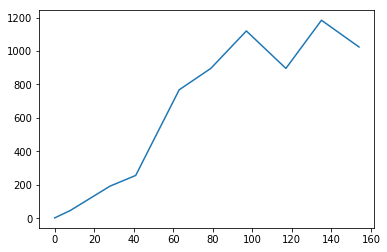

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

days = 0,8,28,41,63,79,97,117,135,154
beetles = 2,47,192,256,768,896,1120,896,1184,1024

plt.plot(days, beetles)

An elementary model for population growth is the logistic model:

$$\frac{dN}{dt} = rN\left(1 - \frac{N}{K}\right)$$

where $N$ is population size, $t$ is time, $r$ is a growth rate parameter, and $K$ is a parameter that represents the population carrying capacity of the environment. The solution to this differential equation is given by: 

$$N_t = f(t) = \frac{KN_0}{N_0 + (K - N_0)\exp(-rt)}$$

where $N_t$ denotes the population size at time $t$. 

1. Fit the logistic growth model to the flour beetle data using the Newton–Raphson approach to minimize the sum of squared errors between model predictions and observed counts.

2. In many population modeling applications, an assumption of lognormality is adopted. The simplest assumption would be that the $\log(N_t)$ are independent and normally distributed with mean $\log[f(t)]$ and variance $\sigma^2$. Find the MLEs under this assumption, and provide estimates of standard errors and correlation between them.

## A1

In [2]:
import pandas as pd
from scipy.optimize import newton

In [3]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [4]:
import scipy.stats as sps

In [5]:
#put the data into a 2d array for ease of use
data0=np.array([days,beetles]) 

In [6]:
#define population growth logistic model
#N_0 is just 2 according to the data
poplog = lambda k,r,t:(2*k/(2+(k-2)*np.exp(-r*t)))

In [7]:
#define error function, will attempt to minimize the sum of squared errors 
def sumsqerr(var,data):
    k,r=var
    hold=(poplog(k,r,data[0])-data[1])**2
    sumofsq=np.sum(hold)
    return(sumofsq)

In [8]:
#tried Nelder-Mead, Powell, CG, and BFGS. Nelder-Mead, Powell, and BFGS seem to work better, and BFGS is a "quasi-Newton method"?
#some random initial values, a high growth rate seems to give poor performance
opt=minimize(sumsqerr,(2,1),args=(data0),method="BFGS")

In [9]:
opt

      fun: 83240.48658321207
 hess_inv: array([[ 1.10614012e-06, -4.83848991e-07],
       [-4.83848991e-07,  2.11672634e-07]])
      jac: array([0.00195312, 0.22851562])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 320
      nit: 21
     njev: 77
   status: 2
  success: False
        x: array([1.03351537e+03, 1.17958547e-01])

Text(0.5,0,'Days')

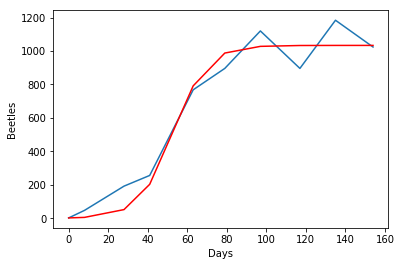

In [10]:
plt.plot(data0[0],data0[1]) #Actual data
plt.plot(data0[0],poplog(opt.x[0],opt.x[1],data0[0]),color="red") #predicted model
plt.ylabel("Beetles")
plt.xlabel("Days")

## A2

In [11]:
#Referenced https://stackoverflow.com/questions/7718034/maximum-likelihood-estimate-pseudocode and http://rlhick.people.wm.edu/posts/estimating-custom-mle.html

#I wasn't sure what to do with this part of the question so I just added that scale variable to fit that links examples

In [12]:
def logLik(var,data): 
    k,r,scale=var
    dataY=np.log(data[1])# take the log of Nt and also the output of 
    return(-np.sum(sps.norm.logpdf(dataY,np.log(poplog(k,r,data[0])),scale=scale)))#also take log of output of poplog

In [13]:
#tried Nelder-Mead, Powell, CG, and BFGS. Nelder-Mead, Powell, and BFGS seem to work better
#some random initial values, a high growth rate seems to give poor performance
optlog=minimize(logLik,(3,2,1),args=(data0),method="BFGS")

/usr/people/chenb3/.conda/envs/pcreodeEnv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/people/chenb3/.conda/envs/pcreodeEnv/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/usr/people/chenb3/.conda/envs/pcreodeEnv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [14]:
optlog

      fun: 11.259708567463319
 hess_inv: array([[ 2.17632393e+08, -3.21248846e+07,  4.43759284e+05],
       [-3.21248846e+07,  4.74209353e+06, -6.55046813e+04],
       [ 4.43759284e+05, -6.55046813e+04,  9.04848445e+02]])
      jac: array([-4.23455238e-03,  5.43372631e-02,  5.97910285e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 242
      nit: 29
     njev: 46
   status: 2
  success: False
        x: array([5.10283693e+02, 4.05725770e-01, 1.00859314e+00])

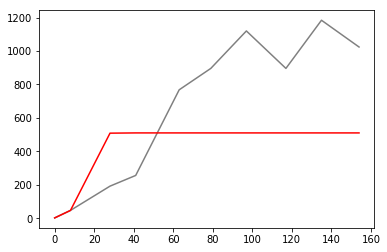

In [15]:
plt.plot(data0[0],data0[1],color="grey") #Actual data
plt.plot(data0[0],poplog(optlog.x[0],optlog.x[1],data0[0]),color="red") #predicted model


In [16]:
#this part references http://rlhick.people.wm.edu/posts/estimating-custom-mle.html

In [17]:
hessian=(optlog['hess_inv'])
se = np.sqrt(np.diag(np.linalg.inv(hessian)))
results = pd.DataFrame({'parameters':optlog['x'],'std err':se})
results.index=['k','r','scale']  

In [18]:
results

,parameters,std err
k,510.283693,0.142026
r,0.405726,1.797446
scale,1.008593,199.270971


## Question 2

1. Implement simulated annealing for minimizing the AIC for the baseball salary regression problem. Model your algorithm on the example given in class. 

    1. Compare the effects of different cooling schedules (different temperatures and different durations at each temperature).  
    2. Compare the effect of a proposal distribution that is discrete uniform over 2-neighborhoods versus one that is discrete uniform over 3-neighborhoods.

2. Implement a genetic algorithm for minimizing the AIC for the baseball salary regression problem. Model your algorithm on Example 3.5. 

    1. Compare the effects of using different mutation rates.  
    2. Compare the effects of using different generation sizes.  
    3. Instead of the selection mechanism used in the class example, try using independent selection of both parents with probabilities proportional to their fitness.



## 1a.

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

baseball = pd.read_table('../data/baseball.dat', sep='\s+')

logsalary = baseball.salary.apply(np.log)
predictors = baseball.loc[:, 'average':]
nrows, ncols = predictors.shape

In [20]:
#initialize some cooling and set up aic

aic = lambda g, X, y: len(y) * np.log(sum((g.predict(X) - y)**2)/len(y)) + 2*g.rank_
tau_start = 10
discrete0 = [tau_start]*60 + [tau_start/2]*120 + [tau_start/10]*240 #straight from example in class
discrete1= [tau_start]*100 + [tau_start/2]*100 + [tau_start/4]*100 + [tau_start/8]*100
continuous0 = [tau_start*0.99**i for i in range(400)] #straight from example in class
continuous1 = [tau_start*0.9**i for i in range(400)]
weird = [tau_start*0.999**i for i in range(200)] + [tau_start/2]*50 + [tau_start/4]*50 + [tau_start/8]*50 + [tau_start/16]*50

In [21]:
j=np.random.randint(0,ncols,2) #generates array of 3rd arg size

In [22]:
def anneal_wrap(cooling,neighbors):
    #initialize with some random aic each time this function runs
    aic_values=[]
    solution_current = solution_best = np.random.binomial(1, 0.5, ncols).astype(bool)
    solution_vars = predictors[predictors.columns[solution_current]]
    g = LinearRegression().fit(X=solution_vars, y=logsalary)
    aic_best = aic(g, solution_vars, logsalary)
    aic_values.append(aic_best)

    for tau in cooling:
        #generate a pool of things to test with different neighbor numbers
        flip_pool = np.random.randint(0, ncols, neighbors)
        #need iterator for flip_pool
        for flip in flip_pool:
            solution_current[flip] = not solution_current[flip]
            solution_vars = predictors[predictors.columns[solution_current]]
            g = LinearRegression().fit(X=solution_vars, y=logsalary)
            aic_step = aic(g, solution_vars, logsalary)
            alpha = min(1, np.exp((aic_values[-1] - aic_step)/tau))
            
        if ((aic_step < aic_values[-1]) or (np.random.uniform() < alpha)):
        # Accept proposed solution
            aic_values.append(aic_step)
            if aic_step < aic_best:
                # Replace previous best with this one
                aic_best = aic_step
                solution_best = solution_current.copy()
        else:
            # Revert solution
            for flip in flip_pool:#iterator needed here too since flip is now flip_pool
                solution_current[flip] = not solution_current[flip]
            aic_values.append(aic_values[-1])
                
    return aic_values #aic_best, baseball.columns[np.where(solution_best)], 

In [23]:
#do it in replicate because there is inherently some stochasticity
def anneal_rep(cooling,neighbors,replicates):
    outputList=[]
    for i in range(0,replicates):
        outputList.append(anneal_wrap(cooling,neighbors))
    return outputList

In [24]:
#compare different cooling schedules
discrete_aic_0=anneal_rep(discrete0,1,3)
discrete_aic_1=anneal_rep(discrete1,1,3)
continuous_aic_0=anneal_rep(continuous0,1,3)
continuous_aic_1=anneal_rep(continuous1,1,3)
weird_aic_0=anneal_rep(weird,1,3)

Text(0.5,0,'weird 0')

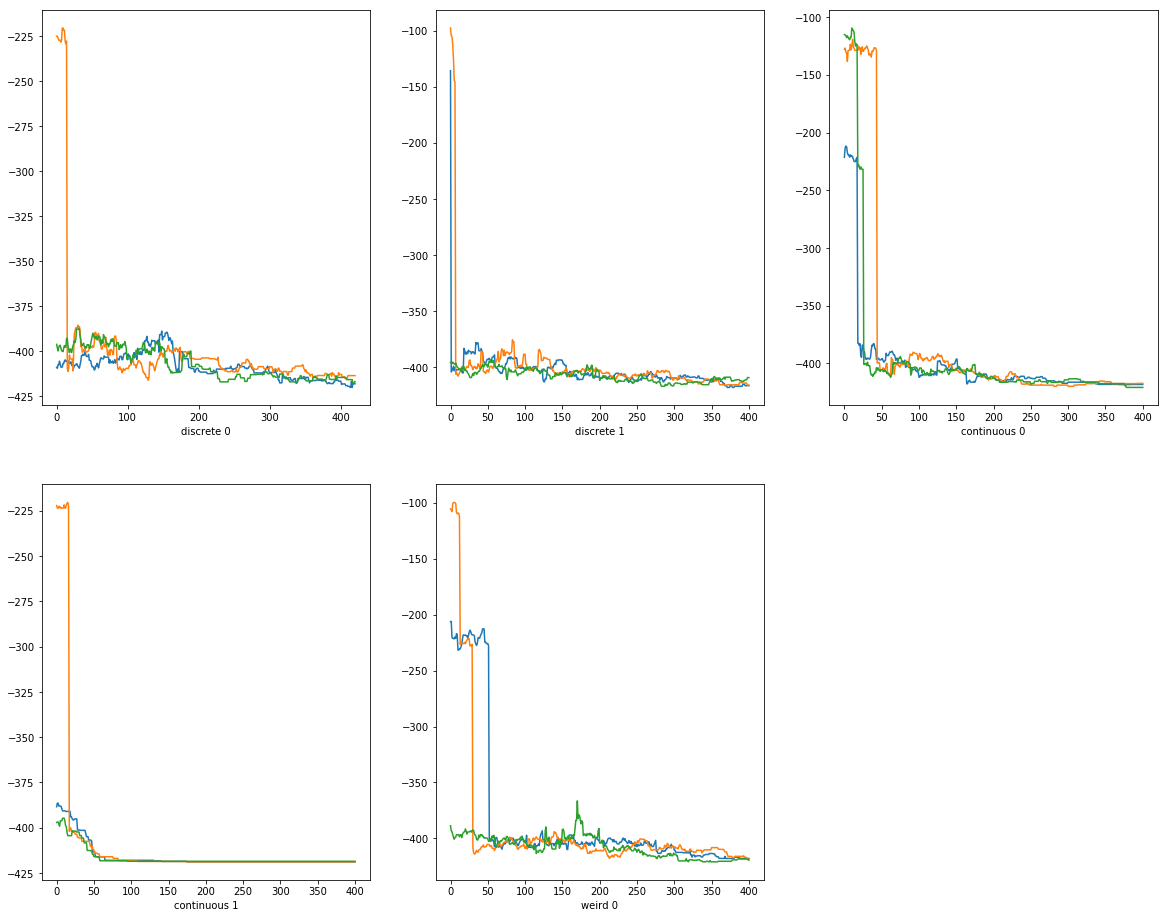

In [25]:
fig=plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

ax1.plot(discrete_aic_0[0])
ax1.plot(discrete_aic_0[1])
ax1.plot(discrete_aic_0[2])
ax1.set_xlabel( "discrete 0")
ax2.plot(discrete_aic_1[0])
ax2.plot(discrete_aic_1[1])
ax2.plot(discrete_aic_1[2])
ax2.set_xlabel( "discrete 1")
ax3.plot(continuous_aic_0[0])
ax3.plot(continuous_aic_0[1])
ax3.plot(continuous_aic_0[2])
ax3.set_xlabel( "continuous 0")
ax4.plot(continuous_aic_1[0])
ax4.plot(continuous_aic_1[1])
ax4.plot(continuous_aic_1[2])
ax4.set_xlabel( "continuous 1")
ax5.plot(weird_aic_0[0])
ax5.plot(weird_aic_0[1])
ax5.plot(weird_aic_0[2])
ax5.set_xlabel( "weird 0")

## 1b.

In [26]:
#compare different cooling schedules
discrete_aic_0_1=anneal_rep(discrete0,1,3)
discrete_aic_0_2=anneal_rep(discrete0,2,3)
discrete_aic_0_3=anneal_rep(discrete0,3,3)

Text(0.5,0,'Neighbors=3')

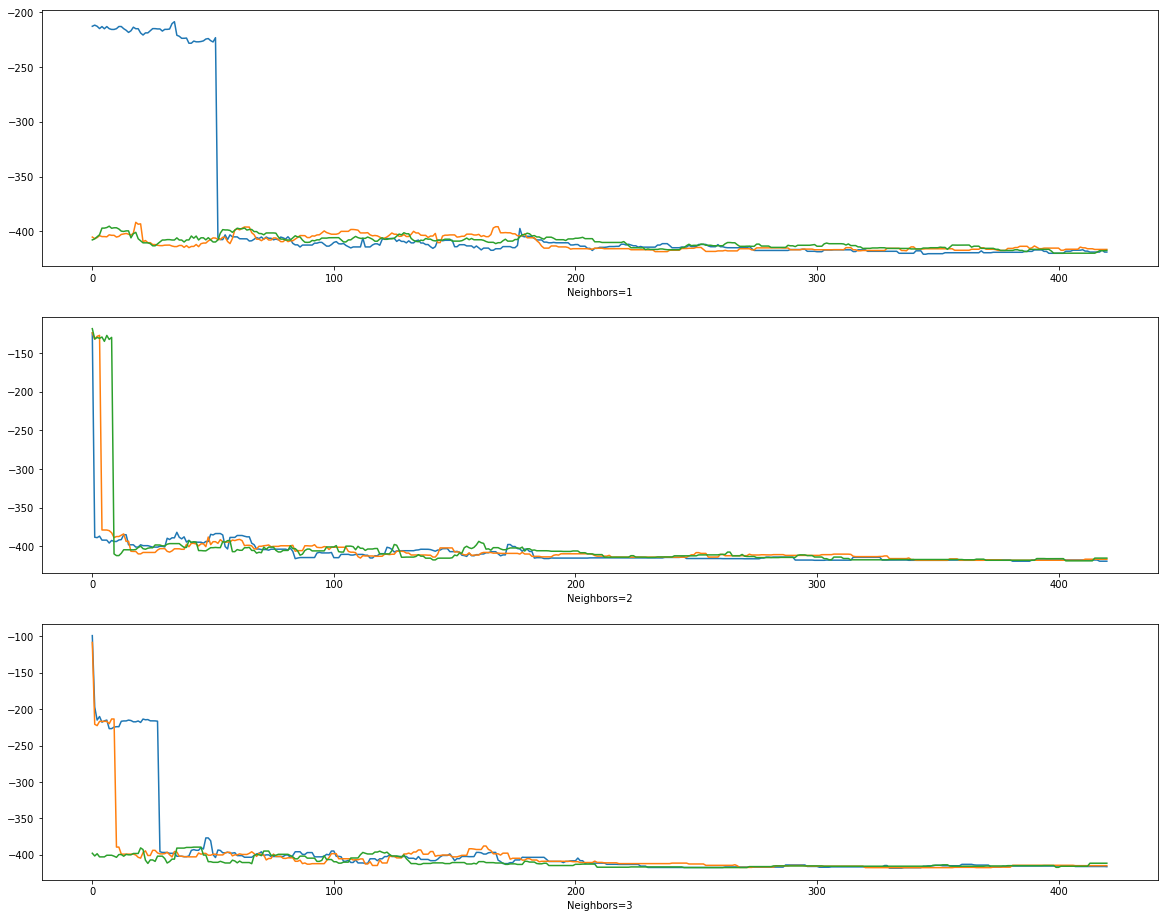

In [27]:
fig=plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(discrete_aic_0_1[0])
ax1.plot(discrete_aic_0_1[1])
ax1.plot(discrete_aic_0_1[2])
ax1.set_xlabel( "Neighbors=1")
ax2.plot(discrete_aic_0_2[0])
ax2.plot(discrete_aic_0_2[1])
ax2.plot(discrete_aic_0_2[2])
ax2.set_xlabel( "Neighbors=2")
ax3.plot(discrete_aic_0_3[0])
ax3.plot(discrete_aic_0_3[1])
ax3.plot(discrete_aic_0_3[2])
ax3.set_xlabel( "Neighbors=3")

## 2a

In [28]:
np.random.seed(1)

In [29]:
def calculate_fitness(aic_values):
    P = len(aic_values)
    aic_rank = (-aic_values).argsort().argsort()+1.
    return 2.*aic_rank/(P*(P+1.))

In [30]:
#pop_size = 20
#iterations = 100
#mutation_rate = .02

In [31]:
def gene_wrapper(pop_size,iterations,mutation_rate): 
    
    # Initialize genotype
    current_gen = np.random.binomial(1, 0.5, pop_size*ncols).reshape((pop_size, ncols))
    aic_best = []
    best_solution = []
    aic_history = []

    for i in range(iterations):

        # Get phenotype
        current_phe = [predictors[predictors.columns[g.astype(bool)]] for g in current_gen]
        # Calculate AIC
        current_aic = np.array([aic(LinearRegression().fit(X=x, y=logsalary), x, logsalary) for x in current_phe])
        # Get lowest AIC
        aic_best.append(current_aic[np.argmin(current_aic)])
        best_solution.append(current_gen[np.argmin(current_aic)])

        # Calculate fitness according to AIC rank
        fitness = calculate_fitness(current_aic)

        # Choose first parents according to fitness
        moms = np.random.choice(range(pop_size), size=int(pop_size/2), p=fitness)
        # Choose second parents randomly
        dads = np.random.choice(range(pop_size), size=int(pop_size/2))

        next_gen = []
        for x,y in zip(current_gen[moms], current_gen[dads]):
            # Crossover
            cross = np.random.randint(0, ncols)
            child1 = np.r_[x[:cross], y[cross:]]
            child2 = np.r_[y[:cross], x[cross:]]
            # Mutate
            m1 = np.random.binomial(1, mutation_rate, size=ncols).astype(bool)
            child1[m1] = abs(child1[m1]-1)
            m2 = np.random.binomial(1, mutation_rate, size=ncols)
            child2[m2] = abs(child1[m2]-1)
            next_gen += [child1, child2]

        # Increment generation
        current_gen = np.array(next_gen)
        # Store AIC values
        aic_history.append(current_aic)
    
    return (aic_best)

In [32]:
#do it in replicate because there is inherently some stochasticity
def gene_rep(pop_size,iterations,mutation_rate,replicates):
    outputList=[]
    for i in range(0,replicates):
        outputList.append(gene_wrapper(pop_size,iterations,mutation_rate))
    return outputList

In [33]:
mut_2=gene_rep(20,100,.2,3)
mut_02=gene_rep(20,100,.02,3)
mut_002=gene_rep(20,100,.002,3)
mut_0002=gene_rep(20,100,.0002,3)

Text(0.5,0,'Mutation .0002')

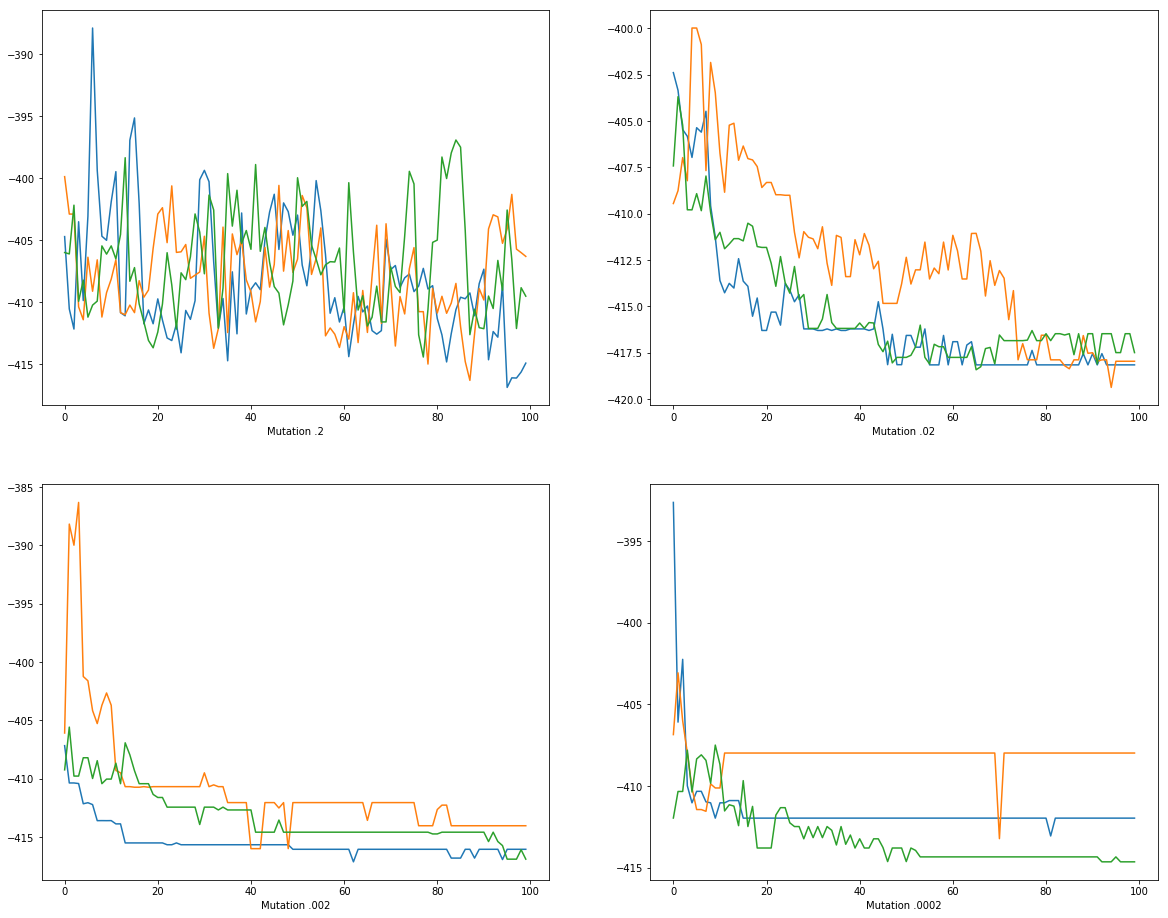

In [34]:
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(mut_2[0])
ax1.plot(mut_2[1])
ax1.plot(mut_2[2])
ax1.set_xlabel( "Mutation .2")
ax2.plot(mut_02[0])
ax2.plot(mut_02[1])
ax2.plot(mut_02[2])
ax2.set_xlabel( "Mutation .02")
ax3.plot(mut_002[0])
ax3.plot(mut_002[1])
ax3.plot(mut_002[2])
ax3.set_xlabel( "Mutation .002")
ax4.plot(mut_0002[0])
ax4.plot(mut_0002[1])
ax4.plot(mut_0002[2])
ax4.set_xlabel( "Mutation .0002")

## 2b

In [35]:
gen_10=gene_rep(10,100,.02,3)
gen_20=gene_rep(20,100,.02,3)
gen_30=gene_rep(30,100,.02,3)
gen_40=gene_rep(40,100,.02,3)

Text(0.5,0,'Gen 40')

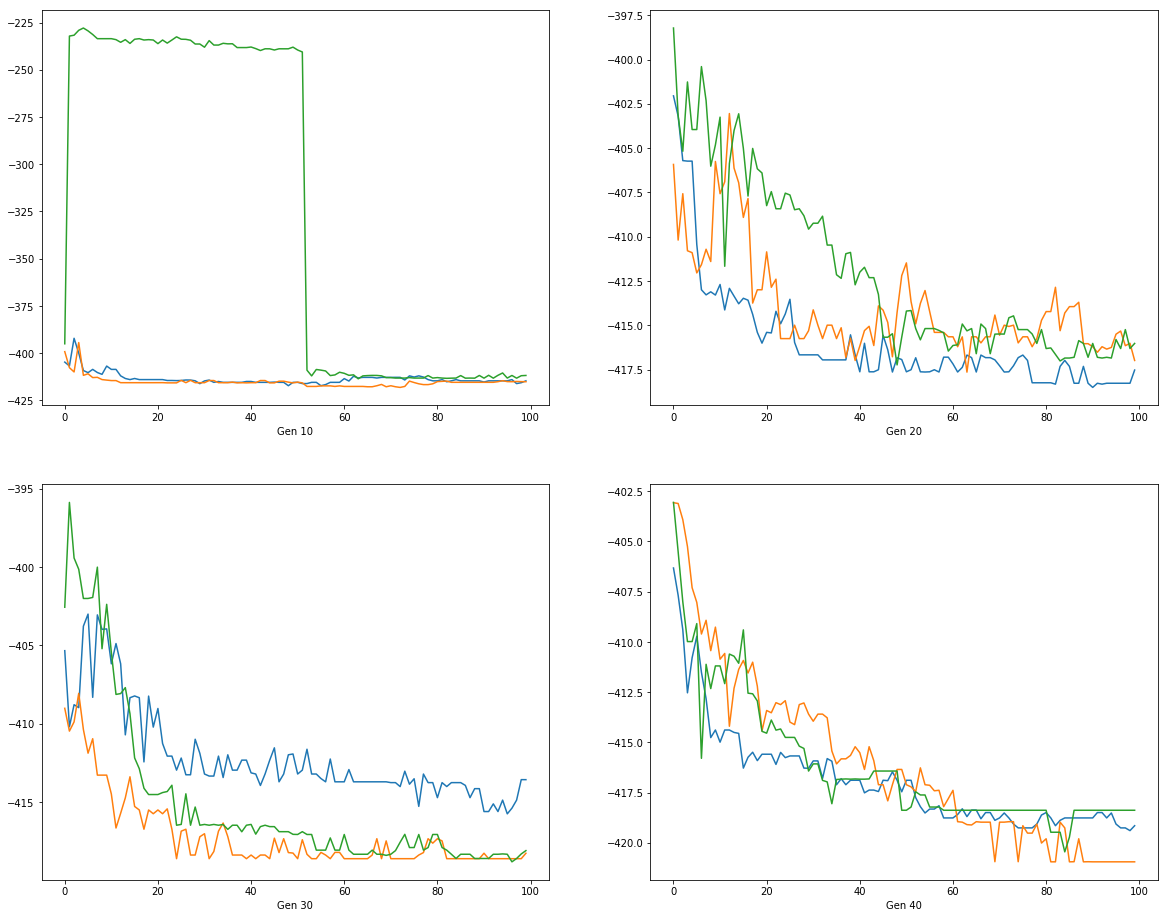

In [36]:
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(gen_10[0])
ax1.plot(gen_10[1])
ax1.plot(gen_10[2])
ax1.set_xlabel( "Gen 10")
ax2.plot(gen_20[0])
ax2.plot(gen_20[1])
ax2.plot(gen_20[2])
ax2.set_xlabel( "Gen 20")
ax3.plot(gen_30[0])
ax3.plot(gen_30[1])
ax3.plot(gen_30[2])
ax3.set_xlabel( "Gen 30")
ax4.plot(gen_40[0])
ax4.plot(gen_40[1])
ax4.plot(gen_40[2])
ax4.set_xlabel( "Gen 40")

## 2c

Instead of the selection mechanism used in the class example, try using independent selection of both parents with probabilities proportional to their fitness.

In [37]:
def gene_wrapper_ind(pop_size,iterations,mutation_rate): 
    
    # Initialize genotype
    current_gen = np.random.binomial(1, 0.5, pop_size*ncols).reshape((pop_size, ncols))
    aic_best = []
    best_solution = []
    aic_history = []

    for i in range(iterations):

        # Get phenotype
        current_phe = [predictors[predictors.columns[g.astype(bool)]] for g in current_gen]
        # Calculate AIC
        current_aic = np.array([aic(LinearRegression().fit(X=x, y=logsalary), x, logsalary) for x in current_phe])
        # Get lowest AIC
        aic_best.append(current_aic[np.argmin(current_aic)])
        best_solution.append(current_gen[np.argmin(current_aic)])

        # Calculate fitness according to AIC rank
        fitness = calculate_fitness(current_aic)

        # Choose first parents according to fitness
        moms = np.random.choice(range(pop_size), size=int(pop_size/2), p=fitness)
        # Choose second parent also according to parent
        dads = np.random.choice(range(pop_size), size=int(pop_size/2), p=fitness)#just added the fitness parameter here

        next_gen = []
        for x,y in zip(current_gen[moms], current_gen[dads]):
            # Crossover
            cross = np.random.randint(0, ncols)
            child1 = np.r_[x[:cross], y[cross:]]
            child2 = np.r_[y[:cross], x[cross:]]
            # Mutate
            m1 = np.random.binomial(1, mutation_rate, size=ncols).astype(bool)
            child1[m1] = abs(child1[m1]-1)
            m2 = np.random.binomial(1, mutation_rate, size=ncols)
            child2[m2] = abs(child1[m2]-1)
            next_gen += [child1, child2]

        # Increment generation
        current_gen = np.array(next_gen)
        # Store AIC values
        aic_history.append(current_aic)
    
    return (aic_best)

In [38]:
#do it in replicate because there is inherently some stochasticity
def gene_rep_ind(pop_size,iterations,mutation_rate,replicates):
    outputList=[]
    for i in range(0,replicates):
        outputList.append(gene_wrapper_ind(pop_size,iterations,mutation_rate))
    return outputList

In [39]:
one_ind=gene_rep(20,100,.02,3)
two_ind=gene_rep_ind(20,100,.02,3)

Text(0.5,0,'Both Parents Independent')

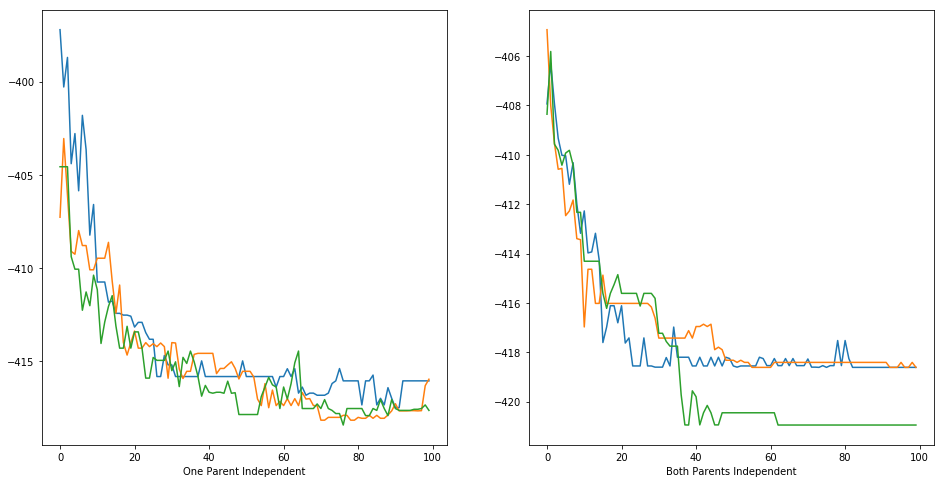

In [40]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(one_ind[0])
ax1.plot(one_ind[1])
ax1.plot(one_ind[2])
ax1.set_xlabel( "One Parent Independent")
ax2.plot(two_ind[0])
ax2.plot(two_ind[1])
ax2.plot(two_ind[2])
ax2.set_xlabel( "Both Parents Independent")

## Question 3

Use the combinatorial optimization method of your choice to obtain a solution to the traveling salesman problem for the Brazilian cities described in the lecture notes, using minimum total distance as the criterion. Use the the first city listed in the dataset as "home" (*i.e.* the trip must start and end there. I will award 5 bonus points to the best solution!

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
import scipy.spatial as sps

In [43]:
def parse_latlon(x):
    d, m, s = map(float, x.split(':'))
    ms = m/60. + s/3600.
    if d<0:
        return d - ms
    return d + ms

cities =  pd.read_csv('../data/brasil_capitals.txt', 
                      names=['city','lat','lon'])[['lat','lon']].applymap(parse_latlon).values

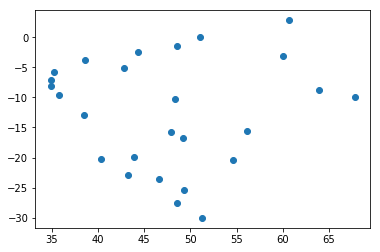

In [44]:
plt.scatter(cities[:,0],cities[:,1])

In [45]:
aic = lambda g, X, y: len(y) * np.log(sum((g.predict(X) - y)**2)/len(y)) + 2*g.rank_ #didnt use this
tau_start = 30000
discrete0 = [tau_start]*60 + [tau_start/2]*120 + [tau_start/10]*240 #straight from example in class
continuous0 = [tau_start*0.9995**i for i in range(30000)] #straight from example in class kind of

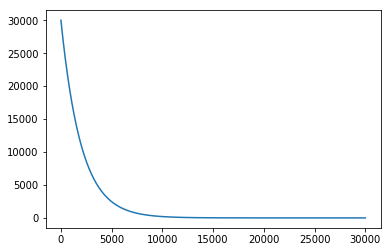

In [46]:
plt.plot(continuous0) #cooling schedule to use

In [47]:
#calculate the distance of a path based on the precomputed pairiwise distance matrix
def path_distance(path,cities):
    n=cities.shape[0]
    dist=sps.distance.squareform(sps.distance.pdist(cities,'euclidean'))#calc pairwise distances for all points to reference later
    dists_to_sum=np.zeros(n)
    for i in path:
        if (i==(n-1)):#edge case for when the loop completes
            dists_to_sum[i]=dist[path[0],path[n-1]]
        else:
            dists_to_sum[i]=dist[path[i],path[i+1]]    
    return sum(dists_to_sum)

In [48]:
#create a candidate path based on some random shuffle given a shuff_size
def create_candidate(current,shuff_size):
    cand=np.copy(current)
    n=current.shape[0]
    ind_to_shuff=np.random.choice(n,shuff_size,replace=False)
    shuff_ind=np.random.permutation(ind_to_shuff)
    while all(ind_to_shuff==shuff_ind):#need to make sure that the shuffling isnt just outputting the same order of visiting
        ind_to_shuff=np.random.choice(n,shuff_size,replace=False)
        shuff_ind=np.random.permutation(ind_to_shuff)
    cand[ind_to_shuff]=cand[shuff_ind]
    return np.copy(cand)

In [49]:
def tsp_wrap(cooling,cities,shuff_size):#wrap it all up, and add the criterion for selection based on the alpha metric or just if distance is lower
    #initialize some random path
    choice=np.arange(0,(cities.shape[0]),1)
    current_path=np.random.choice(choice,(cities.shape[0]),replace=False)
    for tau in cooling:
        #add in something here that changes shuff size based on tau, probably not going to get to this
        candidate_path=create_candidate(current_path,shuff_size)
        #calculate path distances
        current_dist=path_distance(current_path,cities)
        candidate_dist=path_distance(candidate_path,cities)
        alpha = np.exp((current_dist - candidate_dist)/tau)
        if (candidate_dist<current_dist) or (alpha > np.random.uniform()): 
            current_path=np.copy(candidate_path)
    return current_path

In [50]:
def tsp_rep(cooling,cities,shuff_size,reps):#doing this whole process in replicate, also output the best of the replicates 
    replicate_results=[]
    dists=[]
    for i in range(reps):
        replicate_results.append(tsp_wrap(continuous0,cities,shuff_size))
        print ("run {} complete".format(i))
    for j in range(reps):
        dists.append(path_distance(replicate_results[j],cities))
    best=(replicate_results[np.where(dists==min(np.array(dists)))[0][0]])
    return replicate_results,best

In [51]:
def path_plot(path_to_plot,cities,path_color,num_paths):#plot the path, also plot the path from the first to last point, can overlay several paths
    loopLine=[cities[path_to_plot][0],cities[path_to_plot][path_to_plot.shape[0]-1]]
    plt.plot(cities[path_to_plot][:,0],cities[path_to_plot][:,1],'-x',color=path_color,alpha=1/num_paths)
    plt.plot([loopLine[0][0],loopLine[1][0]],[loopLine[0][1],loopLine[1][1]],color=path_color,alpha=1/num_paths)#reattach first to last point

run 0 complete
run 1 complete
run 2 complete
run 3 complete
run 4 complete


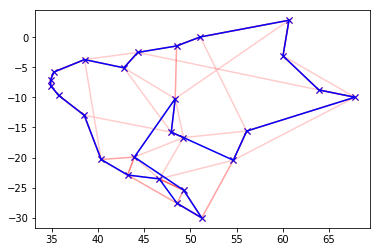

In [52]:
#Try swapping 4 at each candidate creation
results4swap,best_path4=tsp_rep(continuous0,cities,4,5)
best_path4
for i in range(5):
    path_plot(results4swap[i],cities,'red',5) #red is everything
path_plot(best_path4,cities,'blue',1) #blue is best

run 0 complete
run 1 complete
run 2 complete
run 3 complete
run 4 complete


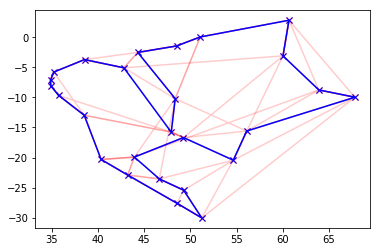

In [53]:
#Try swapping 3 at each candidate creation
results3swap,best_path3=tsp_rep(continuous0,cities,3,5)
for i in range(5):
    path_plot(results3swap[i],cities,'red',5)
path_plot(best_path3,cities,'blue',1) #best

run 0 complete
run 1 complete
run 2 complete
run 3 complete
run 4 complete


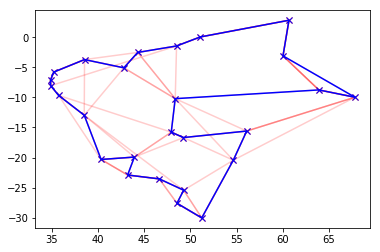

In [54]:
#Try swapping 2 at each candidate creation
results2swap,best_path2=tsp_rep(continuous0,cities,2,5)
for i in range(5):
    path_plot(results2swap[i],cities,'red',5)
path_plot(best_path2,cities,'blue',1)#best

In [55]:
#interesting idea, scale the size of index swaps based on tau, may or may not have time to do this

## Question 4

The `../data/ebola` folder contains summarized reports of Ebola cases from three countries during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

From these data files, use pandas to import them and create a single data frame that includes the daily totals of new cases and deaths for each country.

In [56]:
#use regex for python regex101

In [57]:
#get new cases and death per day each country

In [58]:
import pandas as pd
import numpy as np

In [59]:
import glob

In [60]:
#guinea processing

In [61]:
guinea_files = glob.glob("../data/ebola/guinea_data" + "/*.csv")
guinea_list=[]
for guinea_csv in guinea_files:
    guinea_data=pd.read_csv(guinea_csv)
    guinea_list.append(guinea_data)

In [62]:
g_counts=[]
for day in range(len(guinea_list)):
    g_counts.append(['Guinea',guinea_list[day].iloc[3,0],int(guinea_list[day].iloc[3,2]),int(guinea_list[day].iloc[9,2])])
guinea_counts_df=pd.DataFrame(g_counts)

#row 0=date
#row 2=new cases
#row 13=new deaths

In [63]:
guinea_counts_df.columns=("Country","Date","New Cases (Sus,Prob,Conf)","New Deaths (Sus,Prob,Conf)")
guinea_counts_df

,Country,Date,"New Cases (Sus,Prob,Conf)","New Deaths (Sus,Prob,Conf)"
0,Guinea,2014-09-08,16,4
1,Guinea,2014-09-23,29,3
2,Guinea,2014-09-19,16,5
3,Guinea,2014-09-14,25,1
4,Guinea,2014-09-11,22,2
5,Guinea,2014-08-26,28,5
6,Guinea,2014-09-07,16,4
7,Guinea,2014-09-30,15,4
8,Guinea,2014-09-21,18,0
9,Guinea,2014-09-04,30,5


In [64]:
#liberia

In [65]:
liberia_files = glob.glob("../data/ebola/liberia_data" + "/*.csv")
liberia_list=[]
for liberia_csv in liberia_files:
    liberia_data=pd.read_csv(liberia_csv)
    liberia_list.append(liberia_data)

In [66]:
['Liberia',liberia_list[2].iloc[0,0],(liberia_list[2].fillna(0).iloc[23,2]+liberia_list[2].fillna(0).iloc[24,2]+liberia_list[2].fillna(0).iloc[25,2]),liberia_list[2].iloc[3,2]]

['Liberia', '11/15/2014', 39.0, 12.0]

In [67]:
l_counts=[]
for day in range(len(liberia_list)):
    l_counts.append(['Liberia',liberia_list[day].iloc[0,0],(liberia_list[day].fillna(0).iloc[23,2]+liberia_list[day].fillna(0).iloc[24,2]+liberia_list[day].fillna(0).iloc[25,2]),liberia_list[day].fillna(0).iloc[3,2]])
liberia_counts_df=pd.DataFrame(l_counts)

#col0 date
#row3,col2 deaths 
#row25,col2 new confirmed cases

In [68]:
liberia_counts_df.columns=("Country","Date","New Cases (Sus,Prob,Conf)","New Deaths (Sus,Prob,Conf)")
liberia_counts_df

,Country,Date,"New Cases (Sus,Prob,Conf)","New Deaths (Sus,Prob,Conf)"
0,Liberia,10/18/14,64.0,16.0
1,Liberia,9/8/2014,65.0,47.0
2,Liberia,11/15/2014,39.0,12.0
3,Liberia,09/23/2014,88.0,51.0
4,Liberia,11/14/2014,20.0,20.0
5,Liberia,6/28/2014,9.0,1.0
6,Liberia,6/22/2014,10.0,4.0
7,Liberia,12/2/2014,37.0,0.0
8,Liberia,6/25/14,7.0,3.0
9,Liberia,9/21/2014,50.0,33.0


In [69]:
sl_files = glob.glob("../data/ebola/sl_data" + "/*.csv")
sl_list=[]
for sl_csv in sl_files:
    sl_data=pd.read_csv(sl_csv)
    sl_list.append(sl_data)

In [70]:
['Sierra Leone',sl_list[2].iloc[0,0],(int(sl_list[2].fillna(0).iloc[4,16])+int(sl_list[2].fillna(0).iloc[3,16])+int(sl_list[2].fillna(0).iloc[2,16])),(int(sl_list[2].fillna(0).iloc[11,16])+int(sl_list[2].fillna(0).iloc[10,16])+int(sl_list[2].fillna(0).iloc[9,16]))]

['Sierra Leone', '2014-10-10', 48, 1156]

In [71]:
sl_counts=[]
for day in range(len(sl_list)):
    sl_counts.append(['Sierra Leone',sl_list[day].iloc[0,0],(int(sl_list[day].fillna(0).iloc[4,16])+int(sl_list[day].fillna(0).iloc[3,16])+int(sl_list[day].fillna(0).iloc[2,16])),(int(sl_list[day].fillna(0).iloc[11,16])+int(sl_list[day].fillna(0).iloc[10,16])+int(sl_list[day].fillna(0).iloc[9,16]))])
sl_counts_df=pd.DataFrame(sl_counts)

#col 0 date
#'National' or last column, row 4, new_confirmed, row 3 new_probable, row 2 new_suspected
#'National' or last column, row 11, death_confirmed, 10 death_probable, 9 death_suspected

In [72]:
sl_counts_df.columns=("Country","Date","New Cases (Sus,Prob,Conf)","New Deaths (Sus,Prob,Conf)")
sl_counts_df

,Country,Date,"New Cases (Sus,Prob,Conf)","New Deaths (Sus,Prob,Conf)"
0,Sierra Leone,2014-11-20,130,1648
1,Sierra Leone,2014-11-13,84,1545
2,Sierra Leone,2014-10-10,48,1156
3,Sierra Leone,2014-10-22,55,1281
4,Sierra Leone,2014-10-13,47,1198
5,Sierra Leone,2014-09-16,34,531
6,Sierra Leone,2014-10-01,43,580
7,Sierra Leone,2014-11-01,75,1442
8,Sierra Leone,2014-08-16,21,336
9,Sierra Leone,2014-09-01,11,444


In [73]:
pd.concat([guinea_counts_df,liberia_counts_df,sl_counts_df],axis=0)

,Country,Date,"New Cases (Sus,Prob,Conf)","New Deaths (Sus,Prob,Conf)"
0,Guinea,2014-09-08,16.0,4.0
1,Guinea,2014-09-23,29.0,3.0
2,Guinea,2014-09-19,16.0,5.0
3,Guinea,2014-09-14,25.0,1.0
4,Guinea,2014-09-11,22.0,2.0
5,Guinea,2014-08-26,28.0,5.0
6,Guinea,2014-09-07,16.0,4.0
7,Guinea,2014-09-30,15.0,4.0
8,Guinea,2014-09-21,18.0,0.0
9,Guinea,2014-09-04,30.0,5.0
